## Setup and Import

100%|██████████| 468/468 [00:42<00:00, 11.03it/s]



Loaded 468 files
Total rows: 7667712

Condition counts:
- S1 obj: 2,621,440 rows
- S2 match: 2,605,056 rows
- S2 nomatch: 2,441,216 rows
Creating RawArray with float64 data, n_channels=61, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Filtering raw data in 1 contiguous segment

Condition counts:
- S1 obj: 2,621,440 rows
- S2 match: 2,605,056 rows
- S2 nomatch: 2,441,216 rows
Creating RawArray with float64 data, n_channels=61, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition band

C:\Users\Will\AppData\Local\Temp\ipykernel_6612\1850864053.py:30: RuntimeWarning: filter_length (32769) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  mne_data.filter(l_freq=1.0, h_freq=50.0, filter_length='128s')
c:\Users\Will\miniforge3\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
c:\Users\Will\miniforge3\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


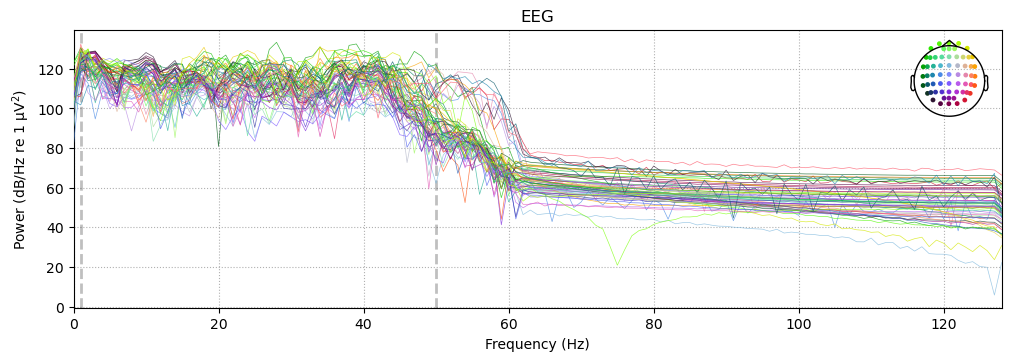

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import random
from mne.viz import plot_topomap

# Import data from main notebook
%run NDS_Project.ipynb

Creating RawArray with float64 data, n_channels=61, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 32769 samples (128.004 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming 

C:\Users\Will\AppData\Local\Temp\ipykernel_6612\1850864053.py:30: RuntimeWarning: filter_length (32769) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  mne_data.filter(l_freq=1.0, h_freq=50.0, filter_length='128s')
c:\Users\Will\miniforge3\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


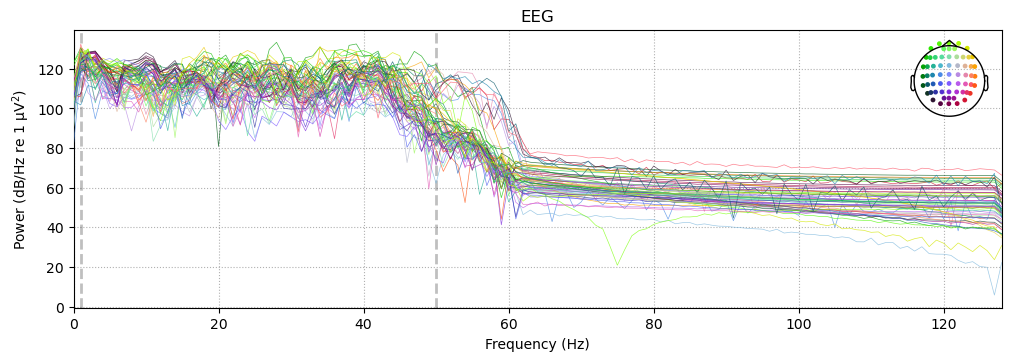

In [2]:
alc_test = csv_to_eeg_data("eeg+database/SMNI_CMI_TRAIN/Data1.csv")
alc_test.plot_psd()

## Regional Analysis: Alcoholic vs Control

In [ ]:
# Get all unique electrode positions from the data
all_electrodes = EEG_data['sensor position'].unique()
print(f"All electrode positions: {sorted(all_electrodes)}\n")

# Define brain regions based on international 10-20 system's region names
regions = {
    'Fp': ['FP1', 'FP2', 'FPZ'],                             # Prefrontal
    'F': ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FZ', 
          'AF1', 'AF2', 'AF7', 'AF8', 'AFZ'],                # Frontal
    'T': ['T7', 'T8', 'FT7', 'FT8', 'TP7', 'TP8'],           # Temporal
    'C': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CZ', 
          'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCZ',
          'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPZ'],  # Central
    'P': ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PZ',
          'PO1', 'PO2', 'PO7', 'PO8', 'POZ'],                # Parietal
    'O': ['O1', 'O2', 'OZ']                                  # Occipital
}

# Function to calculate regional mean for a subject
def calculate_regional_means(data_df, regions):
    regional_means = {}
    
    for region_name, channels in regions.items():
        # Filter data for channels in this region
        region_data = data_df[data_df['sensor position'].isin(channels)]
        if len(region_data) > 0:
            # Calculate mean sensor value across all channels in the region
            regional_means[region_name] = region_data.groupby('sample num')['sensor value'].mean().values
        else:
            regional_means[region_name] = None
    
    return regional_means

# Test with one subject
test_subject = pd.read_csv("eeg+database/SMNI_CMI_TRAIN/Data1.csv")
test_regional = calculate_regional_means(test_subject, regions)

for region in regions.keys():
    shape = test_regional[region].shape if test_regional[region] is not None else 'None'
    print(f"  {region} region shape: {shape}")

All electrode positions: ['AF1', 'AF2', 'AF7', 'AF8', 'AFZ', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPZ', 'CZ', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCZ', 'FP1', 'FP2', 'FPZ', 'FT7', 'FT8', 'FZ', 'O1', 'O2', 'OZ', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PO1', 'PO2', 'PO7', 'PO8', 'POZ', 'PZ', 'T7', 'T8', 'TP7', 'TP8', 'X', 'Y', 'nd']

  Fp region shape: (256,)
  F region shape: (256,)
  T region shape: (256,)
  C region shape: (256,)
  P region shape: (256,)
  O region shape: (256,)


In [4]:
# Calculate regional means for all alcoholic and control subjects
alcoholic_regional = {region: [] for region in regions.keys()}
control_regional = {region: [] for region in regions.keys()}

for file_name in tqdm(file_names):
    # Load subject data
    subject_df = pd.read_csv(f'eeg+database/SMNI_CMI_TRAIN/{file_name}')
    
    # Get subject type (alcoholic = 'a', control = 'c')
    subject_type = subject_df['subject identifier'].iloc[0]
    
    # Calculate regional means
    regional_means = calculate_regional_means(subject_df, regions)
    
    # Store in appropriate group
    if subject_type == 'a':
        for region in regions.keys():
            if regional_means[region] is not None:
                alcoholic_regional[region].append(regional_means[region])
    else:  # control
        for region in regions.keys():
            if regional_means[region] is not None:
                control_regional[region].append(regional_means[region])

# Convert to arrays and calculate means across subjects
alcoholic_means = {region: np.mean(np.array(data), axis=0) for region, data in alcoholic_regional.items()}
control_means = {region: np.mean(np.array(data), axis=0) for region, data in control_regional.items()}

# Calculate differences (Alcoholic - Control)
regional_differences = {region: alcoholic_means[region] - control_means[region] 
                        for region in regions.keys()}

print(f"\nProcessed {len(file_names)} subjects")
print(f"Alcoholic subjects: {len(alcoholic_regional['Fp'])}")
print(f"Control subjects: {len(control_regional['Fp'])}")

100%|██████████| 468/468 [00:06<00:00, 71.25it/s]


Processed 468 subjects
Alcoholic subjects: 235
Control subjects: 233


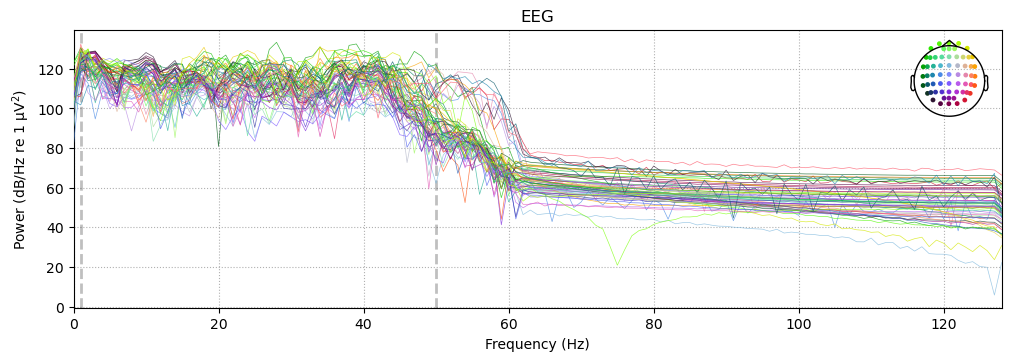

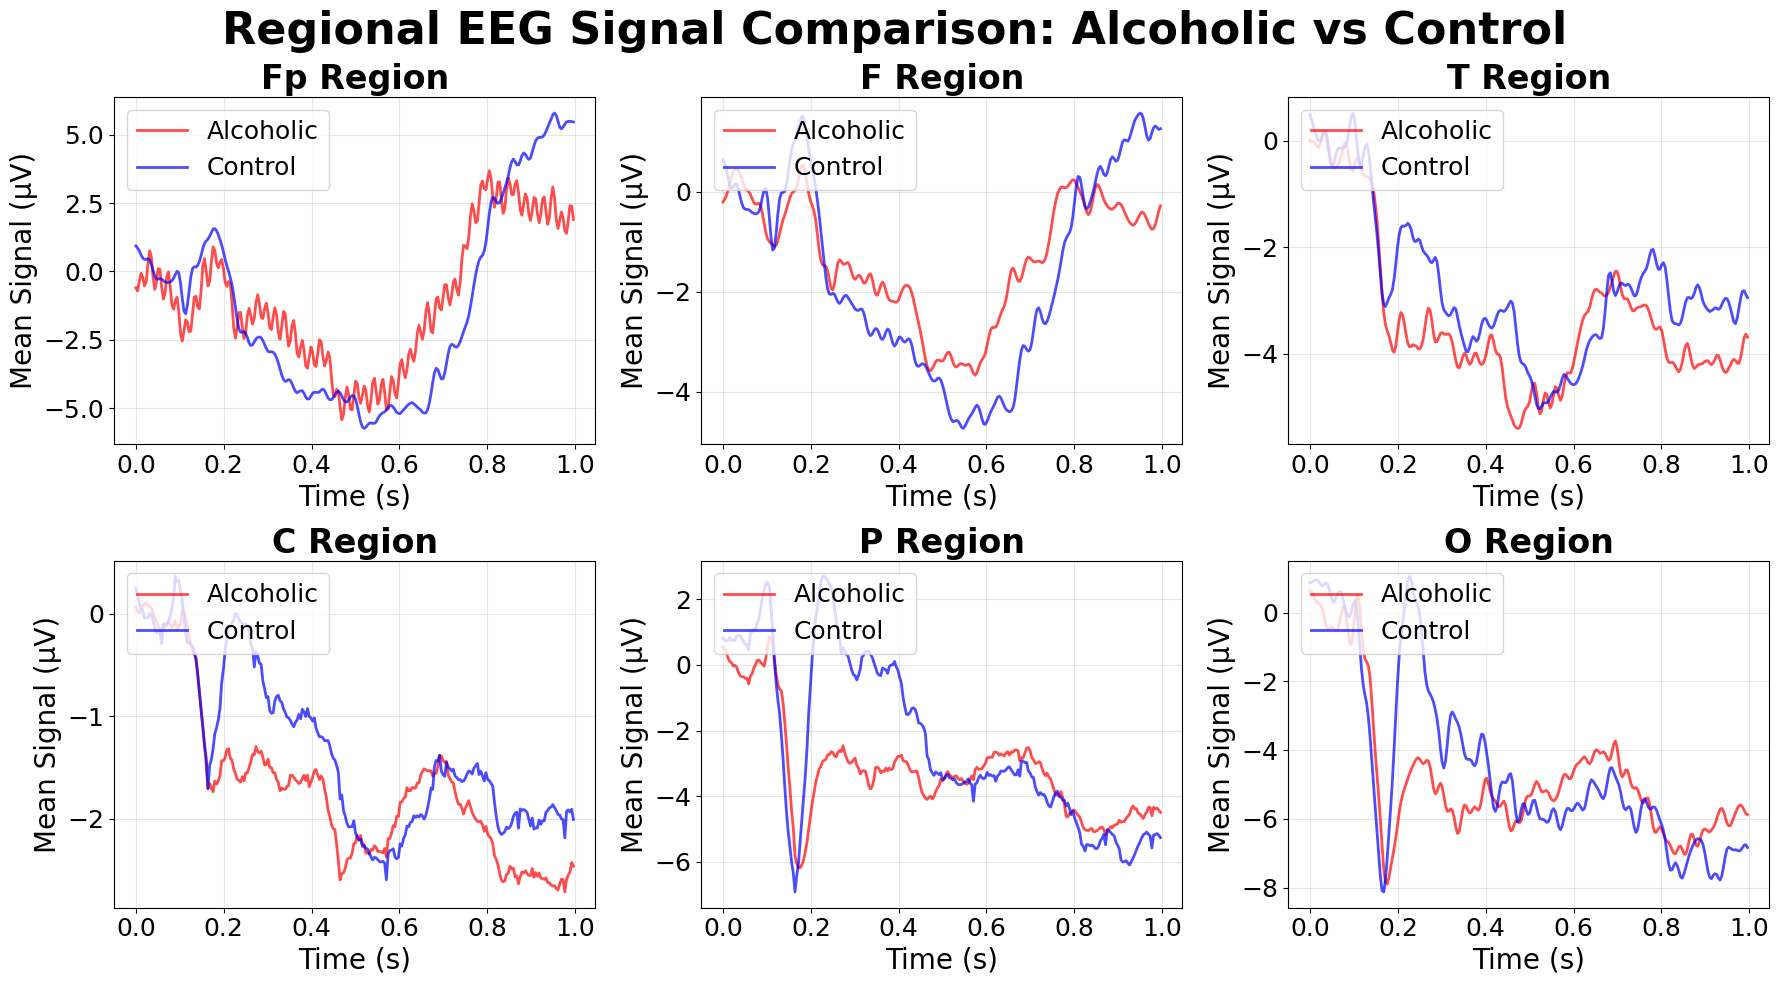


Regional Signal Differences (Mean, Std):
Fp Region:  +0.291 µV, Std:  1.735 µV
F  Region:  +0.314 µV, Std:  1.065 µV
T  Region:  -0.599 µV, Std:  0.715 µV
C  Region:  -0.361 µV, Std:  0.442 µV
P  Region:  -0.768 µV, Std:  1.809 µV
O  Region:  -0.274 µV, Std:  1.659 µV


In [5]:
# Visualize the differences between alcoholic and control groups
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

time_points = np.arange(256) / 256  # Frequency to time points  conversion

for idx, (region, diff) in enumerate(regional_differences.items()):
    ax = axes[idx]
    
    # Plot alcoholic mean
    ax.plot(time_points, alcoholic_means[region], label='Alcoholic', color='red', alpha=0.7, linewidth=2)
    
    # Plot control mean
    ax.plot(time_points, control_means[region], label='Control', color='blue', alpha=0.7, linewidth=2)
    
    ax.set_xlabel('Time (s)', fontsize=20)
    ax.set_ylabel('Mean Signal (µV)', fontsize=20)
    ax.set_title(f'{region} Region', fontsize=24, fontweight='bold')
    ax.legend(loc='upper left', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.grid(True, alpha=0.3)

plt.suptitle('Regional EEG Signal Comparison: Alcoholic vs Control', fontsize=32, fontweight='bold')
plt.tight_layout()
plt.show()

# Print statistics
print("\nRegional Signal Differences (Mean, Std):")
for region in regions.keys():
    mean_diff = np.mean(regional_differences[region])
    std_diff = np.std(regional_differences[region])
    print(f"{region:2s} Region: {mean_diff:+7.3f} µV, Std: {std_diff:6.3f} µV") # Fancy formatting!

## Regional Analysis by Condition
Now let's create separate plots for each stimulus condition

In [6]:
# Get unique conditions from the data
unique_conditions = EEG_data['matching condition'].unique()
print(f"Available conditions: {sorted(unique_conditions)}")

# We'll create plots for the first 3 conditions
conditions_to_plot = sorted(unique_conditions)[:3]
print(f"\nWill create plots for: {conditions_to_plot}")

Available conditions: ['S1 obj', 'S2 match', 'S2 nomatch']

Will create plots for: ['S1 obj', 'S2 match', 'S2 nomatch']


In [7]:
# Function to calculate regional means for a specific condition
def calculate_regional_means_by_condition(data_df, regions, condition):
    # Filter for the specific condition
    condition_data = data_df[data_df['matching condition'] == condition]
    
    regional_means = {}
    for region_name, channels in regions.items():
        # Filter data for channels in this region
        region_data = condition_data[condition_data['sensor position'].isin(channels)]
        if len(region_data) > 0:
            # Calculate mean sensor value across all channels in the region
            regional_means[region_name] = region_data.groupby('sample num')['sensor value'].mean().values
        else:
            regional_means[region_name] = None
    
    return regional_means

# Calculate regional means for each condition, separated by alcoholic and control
def process_condition(condition_name, file_names, regions):
    alcoholic_regional = {region: [] for region in regions.keys()}
    control_regional = {region: [] for region in regions.keys()}
    
    for file_name in tqdm(file_names, desc=f"Processing {condition_name}"):
        # Load subject data
        subject_df = pd.read_csv(f'eeg+database/SMNI_CMI_TRAIN/{file_name}')
        
        # Clean the condition name (remove comma from S2 nomatch, just like in main notebook)
        subject_df.loc[subject_df['matching condition'] == 'S2 nomatch,', 'matching condition'] = 'S2 nomatch'
        
        # Check if this file contains the condition
        if condition_name not in subject_df['matching condition'].values:
            continue
        
        # Get subject type (alcoholic = 'a', control = 'c')
        subject_type = subject_df['subject identifier'].iloc[0]
        
        # Calculate regional means for this condition
        regional_means = calculate_regional_means_by_condition(subject_df, regions, condition_name)
        
        # Store in appropriate group
        if subject_type == 'a':
            for region in regions.keys():
                if regional_means[region] is not None:
                    alcoholic_regional[region].append(regional_means[region])
        else:  # control
            for region in regions.keys():
                if regional_means[region] is not None:
                    control_regional[region].append(regional_means[region])
    
    # Convert to arrays and calculate means across subjects
    alcoholic_means = {region: np.mean(np.array(data), axis=0) if len(data) > 0 else None 
                       for region, data in alcoholic_regional.items()}
    control_means = {region: np.mean(np.array(data), axis=0) if len(data) > 0 else None 
                     for region, data in control_regional.items()}
    
    return alcoholic_means, control_means, len(alcoholic_regional['Fp']), len(control_regional['Fp'])

print("Functions defined and ready to process conditions.")

Functions defined and ready to process conditions.


In [8]:
# Process each of the first 3 conditions
condition_results = {}

for condition in conditions_to_plot:
    alc_means, ctrl_means, alc_count, ctrl_count = process_condition(condition, file_names, regions)
    condition_results[condition] = {
        'alcoholic_means': alc_means,
        'control_means': ctrl_means,
        'alcoholic_count': alc_count,
        'control_count': ctrl_count
    }
    print(f"\n{condition}: {alc_count} alcoholic subjects, {ctrl_count} control subjects")

Processing S1 obj: 100%|██████████| 468/468 [00:05<00:00, 82.58it/s]



S1 obj: 80 alcoholic subjects, 80 control subjects


Processing S2 match: 100%|██████████| 468/468 [00:05<00:00, 82.85it/s]



S2 match: 80 alcoholic subjects, 79 control subjects


Processing S2 nomatch: 100%|██████████| 468/468 [00:05<00:00, 83.58it/s]


S2 nomatch: 75 alcoholic subjects, 74 control subjects


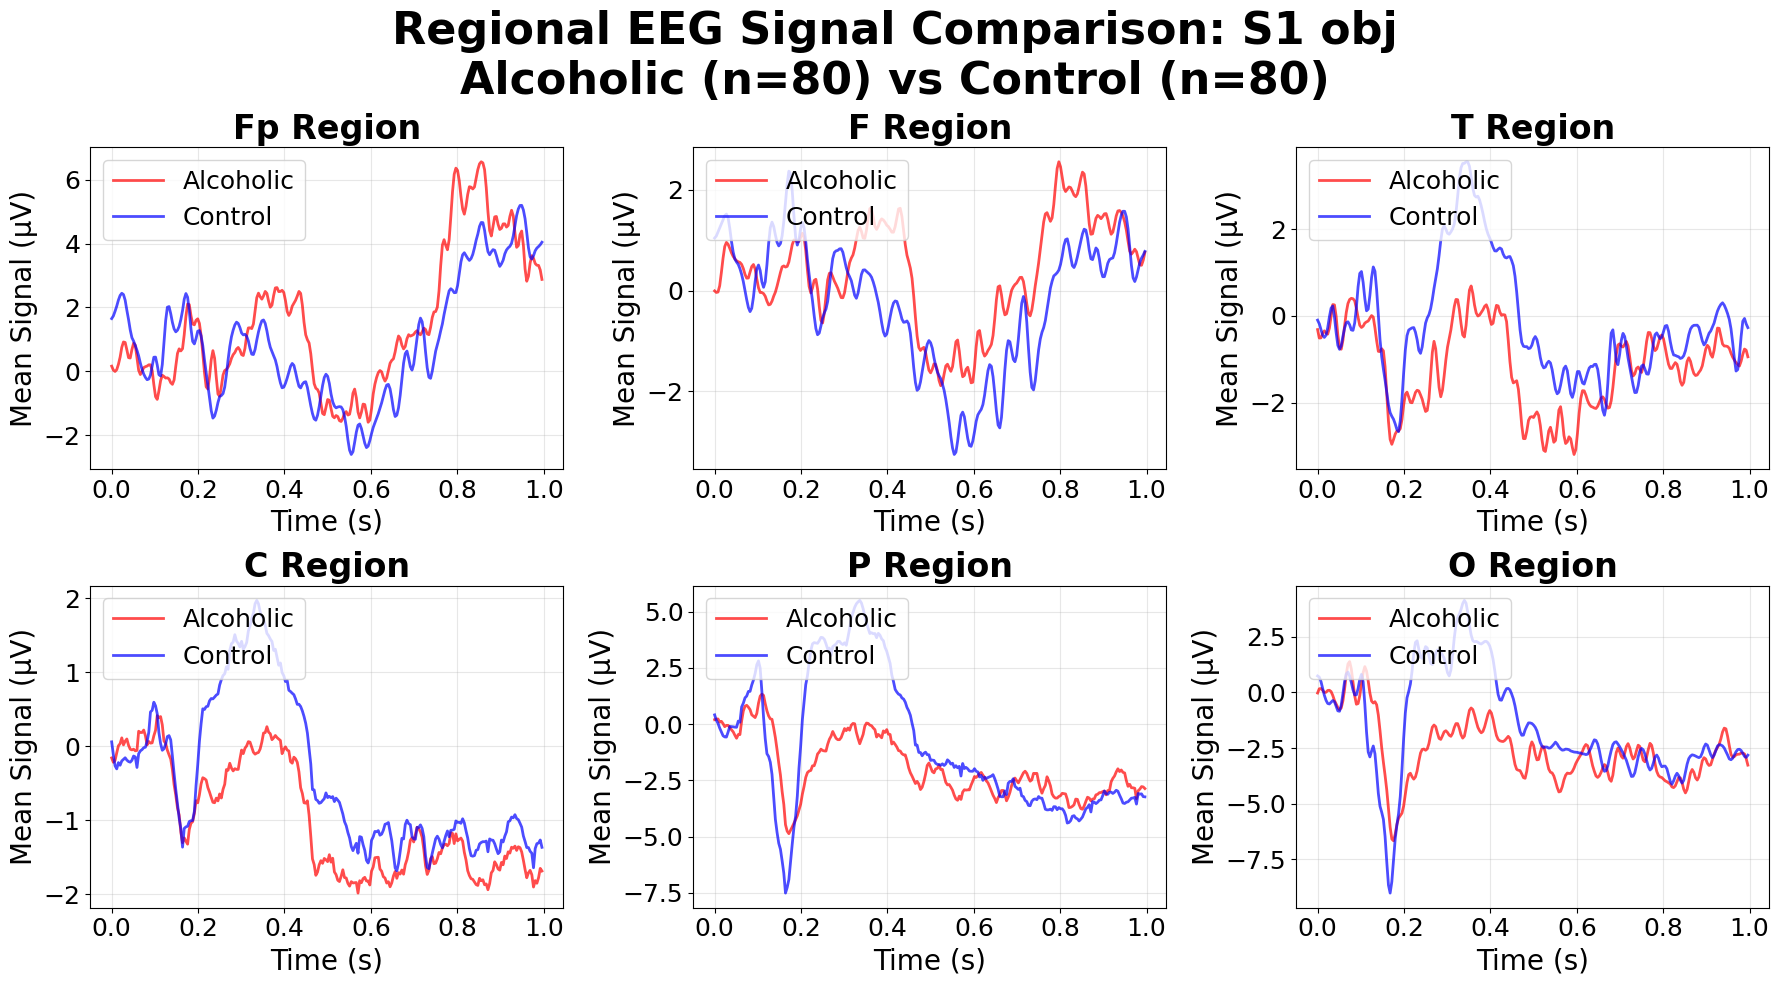


S1 obj - Regional Signal Differences (Mean, Std):
Fp Region:  +0.552 µV, Std:  1.255 µV
F  Region:  +0.609 µV, Std:  0.939 µV
T  Region:  -0.962 µV, Std:  0.997 µV
C  Region:  -0.566 µV, Std:  0.545 µV
P  Region:  -0.924 µV, Std:  2.171 µV
O  Region:  -1.029 µV, Std:  1.932 µV




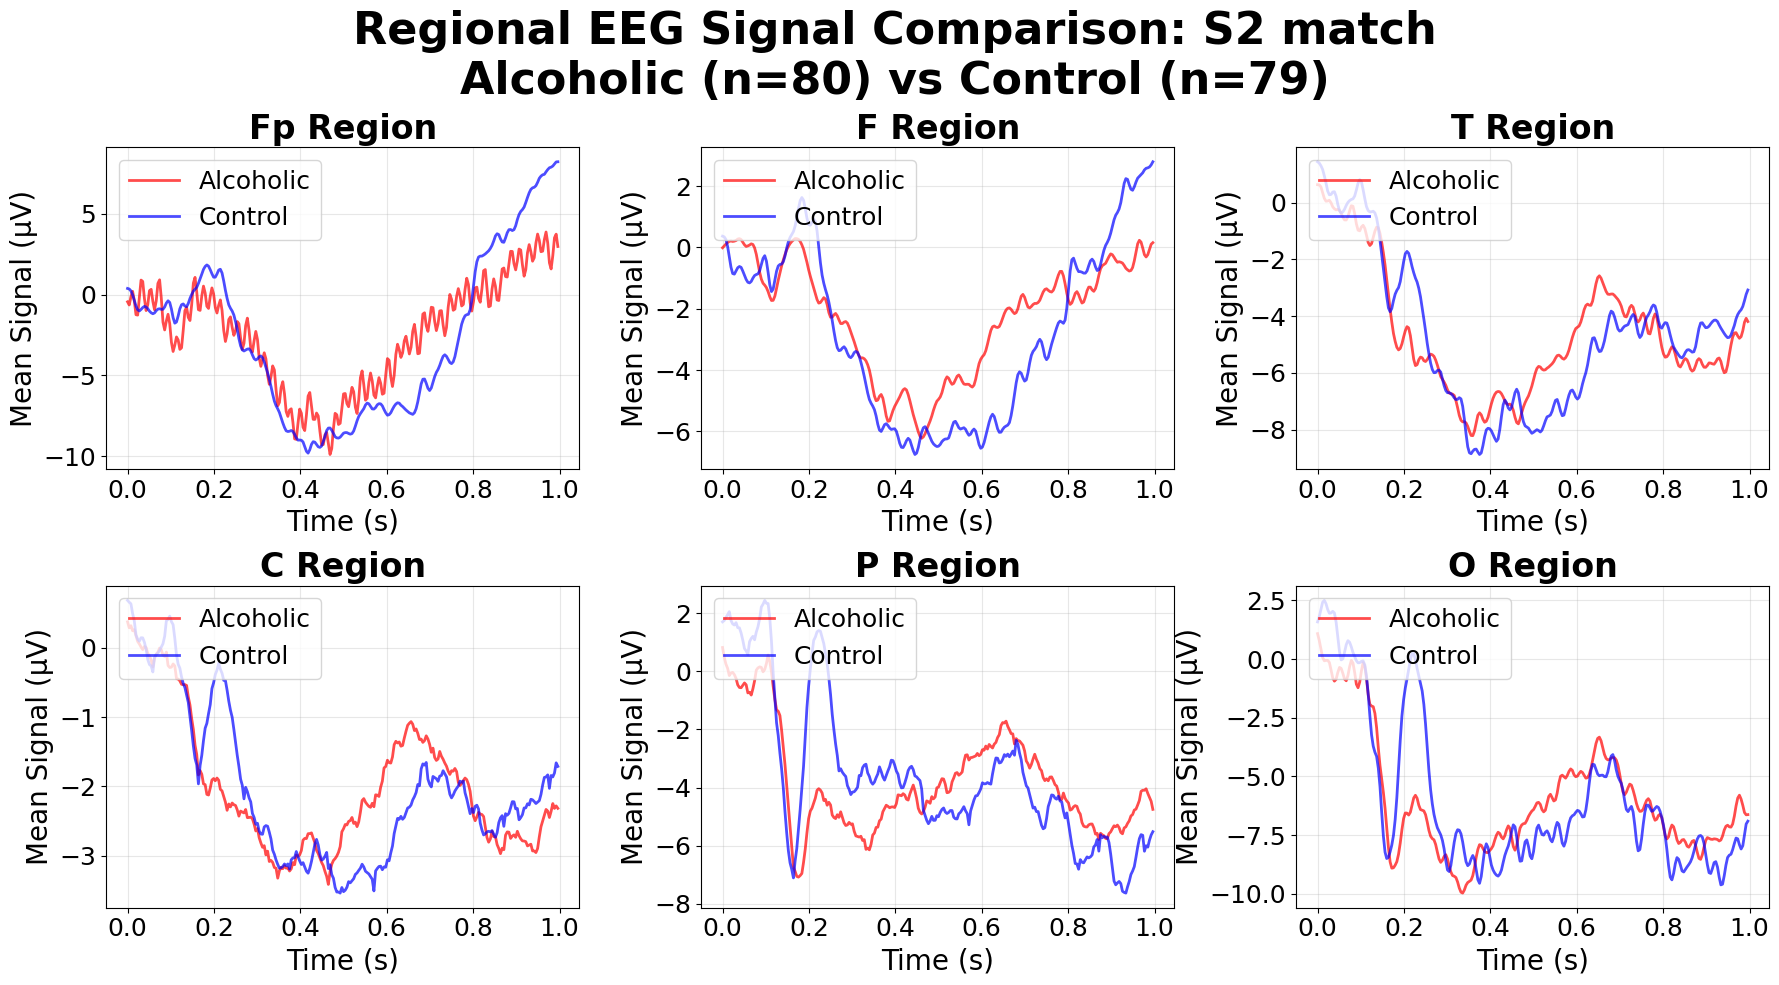


S2 match - Regional Signal Differences (Mean, Std):
Fp Region:  +0.154 µV, Std:  2.408 µV
F  Region:  +0.456 µV, Std:  1.554 µV
T  Region:  +0.027 µV, Std:  1.271 µV
C  Region:  +0.018 µV, Std:  0.665 µV
P  Region:  -0.213 µV, Std:  1.863 µV
O  Region:  +0.004 µV, Std:  1.896 µV




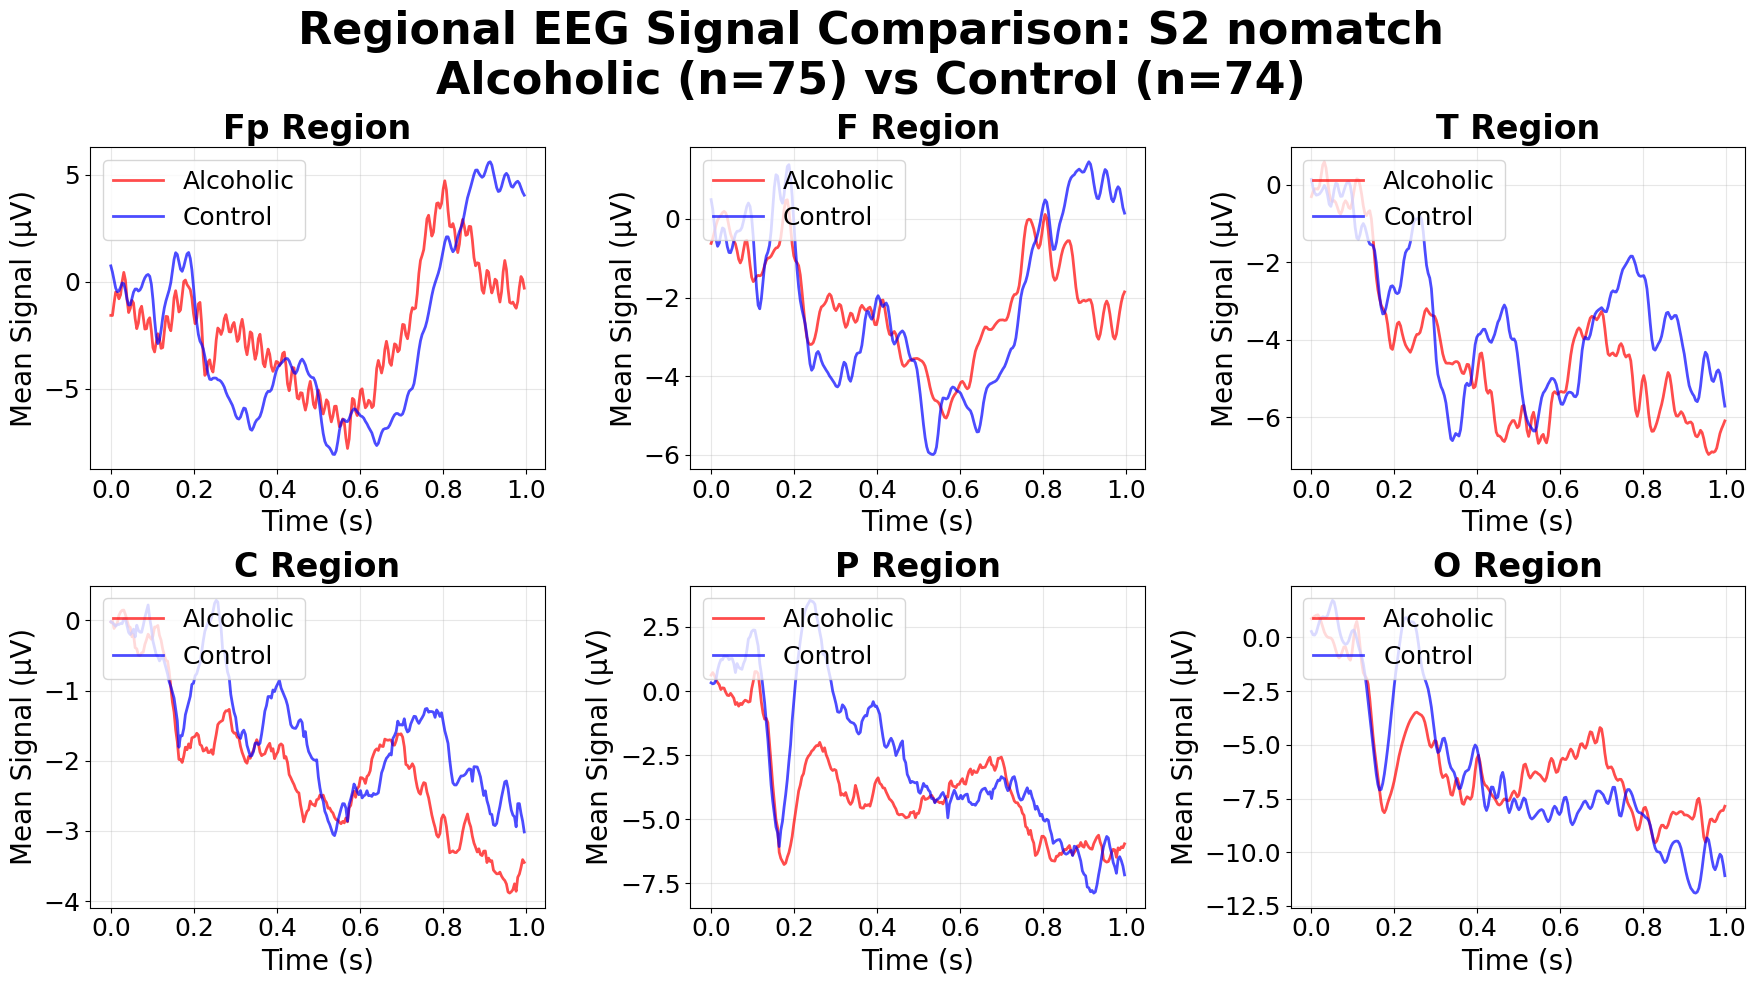


S2 nomatch - Regional Signal Differences (Mean, Std):
Fp Region:  +0.190 µV, Std:  2.704 µV
F  Region:  -0.133 µV, Std:  1.506 µV
T  Region:  -0.845 µV, Std:  1.346 µV
C  Region:  -0.535 µV, Std:  0.598 µV
P  Region:  -1.175 µV, Std:  1.870 µV
O  Region:  +0.277 µV, Std:  2.029 µV




In [9]:
# Create individual plots for each condition
time_points = np.arange(256) / 256

for condition in conditions_to_plot:
    result = condition_results[condition]
    alc_means = result['alcoholic_means']
    ctrl_means = result['control_means']
    
    # Create subplot for this condition
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    for idx, region in enumerate(regions.keys()):
        ax = axes[idx]
        
        # Only plot if we have data for both groups
        if alc_means[region] is not None and ctrl_means[region] is not None:
            # Plot alcoholic mean
            ax.plot(time_points, alc_means[region], label='Alcoholic', 
                   color='red', alpha=0.7, linewidth=2)
            
            # Plot control mean
            ax.plot(time_points, ctrl_means[region], label='Control', 
                   color='blue', alpha=0.7, linewidth=2)
            
            ax.set_xlabel('Time (s)', fontsize=20)
            ax.set_ylabel('Mean Signal (µV)', fontsize=20)
            ax.set_title(f'{region} Region', fontsize=24, fontweight='bold')
            ax.legend(loc='upper left', fontsize=18)
            ax.tick_params(axis='both', which='major', labelsize=18)
            ax.grid(True, alpha=0.3)
        else:
            ax.text(0.5, 0.5, 'No data', ha='center', va='center', fontsize=16)
            ax.set_title(f'{region} Region', fontsize=24, fontweight='bold')
    
    plt.suptitle(f'Regional EEG Signal Comparison: {condition}\n'
                 f'Alcoholic (n={result["alcoholic_count"]}) vs Control (n={result["control_count"]})', 
                 fontsize=32, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Print statistics for this condition
    print(f"\n{condition} - Regional Signal Differences (Mean, Std):")
    for region in regions.keys():
        if alc_means[region] is not None and ctrl_means[region] is not None:
            diff = alc_means[region] - ctrl_means[region]
            mean_diff = np.mean(diff)
            std_diff = np.std(diff)
            print(f"{region:2s} Region: {mean_diff:+7.3f} µV, Std: {std_diff:6.3f} µV")
    print("\n" + "="*60 + "\n")